In [13]:
# From 20240308-105400, all configs switched to full lidar

In [1]:
import sensus
import numpy as np
import os
import json
import pandas as pd
from matplotlib import pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
workdirs_path = os.path.join(sensus.__path__[0], 'work_dirs')

In [3]:
models_dict = {
    'PointPillars_Infrastructure': {
        'name': 'pointpillars_hv_secfpn_8xb6-160e_dair-infrastructure-3d-3class',
        # 'data': '20240226_182316'
        'data': '20240311_005744'
    },
    'PointPillars_Vehicle': {
        'name': 'pointpillars_hv_secfpn_8xb6-160e_dair-vehicle-3d-3class',
        'data': '20240227_021429'
    },
    'Second_Infrastructure': {
        'name': 'second_hv_secfpn_8xb6-80e_dair-infrastructure-3class',
        'data': '20240224_014749'
    },
    'Second_Vehicle': {
        'name': 'second_hv_secfpn_8xb6-80e_dair-vehicle-lidar-reduced-3class',
        'data': '20240227_112505'
    },
    'PV-RCNN_Infrastructure': {
        'name': 'pv_rcnn_8xb2-80e_dair-infrastructure-3d-3class',
        'data': '20240307_211314'
    },
}

In [4]:
# scalars_path = 'pointpillars_hv_secfpn_8xb6-160e_dair-vehicle-3d-3class/20240227_021429/vis_data/scalars.json'
def load_scalars_json(json_path):
    data = []
    with open(json_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [5]:
def get_data_from_json(data, metrics_names):
    metrics_dict = {metric: [] for metric in metrics_names}
    metrics_dict['epoch'] = []
    for i in range(len(data)):
        eval = False
        for key in data[i].keys():
            if key in metrics_names:
                eval = True
                metrics_dict[key].append(data[i][key])
        if eval:
            metrics_dict['epoch'].append(data[i]['step'])
    return metrics_dict

In [6]:
metrics_names = ['Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Overall_3D_AP40_moderate',
    'Kitti metric/pred_instances_3d/KITTI/Overall_BEV_AP40_moderate']

In [7]:
for key in models_dict.keys():
    json_path = os.path.join(workdirs_path, 
        models_dict[key]['name'], 
        models_dict[key]['data'], 'vis_data', 'scalars.json')
    data = load_scalars_json(json_path)
    models_dict[key]['metrics'] = get_data_from_json(data, metrics_names)

In [8]:
models_names = list(models_dict.keys())
models_names

['PointPillars_Infrastructure',
 'PointPillars_Vehicle',
 'Second_Infrastructure',
 'Second_Vehicle',
 'PV-RCNN_Infrastructure']

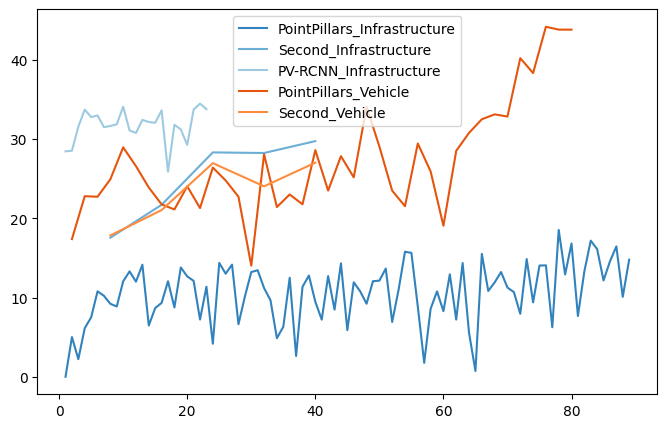

In [9]:
plt.figure(figsize=(8, 5))
i = 0
for key in models_dict.keys():
    if 'Infrastructure' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 0))
        i += 1

i = 0
for key in models_dict.keys():
    if 'Vehicle' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 4))
        i += 1

plt.legend()

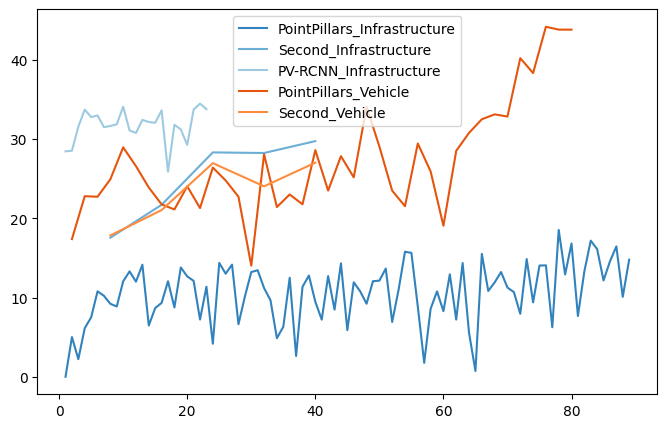

In [10]:
plt.figure(figsize=(8, 5))
i = 0
for key in models_dict.keys():
    if 'Infrastructure' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 0))
        i += 1

i = 0
for key in models_dict.keys():
    if 'Vehicle' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 4))
        i += 1

plt.legend()

In [11]:
models_dict.keys()

dict_keys(['PointPillars_Infrastructure', 'PointPillars_Vehicle', 'Second_Infrastructure', 'Second_Vehicle', 'PV-RCNN_Infrastructure'])

In [21]:
# Create a dataframe with the metrics
metrics_df = pd.DataFrame()
for key in models_dict.keys():
    for metric in metrics_names:
        print(models_dict[key]['metrics'][metric][-1])
        metrics_df[key + '_' + metric.split('/')[-1]] = models_dict[key]['metrics'][metric][-1]

1.1364
1.3636
1.6822
1.6822
1.5548
2.402
11.4258
11.76
14.7913
19.4681
27.3789
29.7798
5.8275
7.7446
41.5793
47.9853
55.982
56.2614
35.5807
40.2247
54.6446
55.6326
43.8123
56.0397
69.5933
72.8144
40.3241
48.0833
11.2025
13.6483
22.2345
22.5063
14.4954
17.0791
25.3912
25.6935
29.7454
32.5979
37.9647
38.3194
18.4811
21.1084
41.7384
49.2976
64.2832
65.3658
24.3043
26.8797
46.3719
49.1643
27.0264
34.3198
49.0216
52.7105
31.023
36.8324
13.4177
15.8279
24.8756
24.919
11.412
12.3702
21.4052
21.5631
33.7814
37.372
40.9746
43.1808
19.537
21.8567


In [19]:
metrics_df

,PointPillars_Infrastructure_Pedestrian_3D_AP40_moderate_strict,PointPillars_Infrastructure_Pedestrian_BEV_AP40_moderate_strict,PointPillars_Infrastructure_Pedestrian_3D_AP40_moderate_loose,PointPillars_Infrastructure_Pedestrian_BEV_AP40_moderate_loose,PointPillars_Infrastructure_Cyclist_3D_AP40_moderate_strict,PointPillars_Infrastructure_Cyclist_BEV_AP40_moderate_strict,PointPillars_Infrastructure_Cyclist_3D_AP40_moderate_loose,PointPillars_Infrastructure_Cyclist_BEV_AP40_moderate_loose,PointPillars_Infrastructure_Car_3D_AP40_moderate_strict,PointPillars_Infrastructure_Car_BEV_AP40_moderate_strict,...,PV-RCNN_Infrastructure_Cyclist_3D_AP40_moderate_strict,PV-RCNN_Infrastructure_Cyclist_BEV_AP40_moderate_strict,PV-RCNN_Infrastructure_Cyclist_3D_AP40_moderate_loose,PV-RCNN_Infrastructure_Cyclist_BEV_AP40_moderate_loose,PV-RCNN_Infrastructure_Car_3D_AP40_moderate_strict,PV-RCNN_Infrastructure_Car_BEV_AP40_moderate_strict,PV-RCNN_Infrastructure_Car_3D_AP40_moderate_loose,PV-RCNN_Infrastructure_Car_BEV_AP40_moderate_loose,PV-RCNN_Infrastructure_Overall_3D_AP40_moderate,PV-RCNN_Infrastructure_Overall_BEV_AP40_moderate
